# NBAPositionify: Leveraging Data Mining Techniques to Classify Professional Basketball Players into Positions

In [24]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
## Get Dataset from Kaggle
# Requires the kaggle package to download dataset. Uncomment the line below to install
# !pip3 install kaggle
import kaggle
# Requires kaggle.json (Kaggle API Key) placed in ~/.kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("drgilermo/nba-players-stats", path="./data/", unzip=True)

## Exploratory Data Analysis

Our data is from `basketball-reference.com`. Three datasets:

In [26]:
player_data = pd.read_csv("./data/player_data.csv")
player_data.head(1)


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University


In [27]:
players = pd.read_csv("./data/Players.csv")
players.head(1)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN


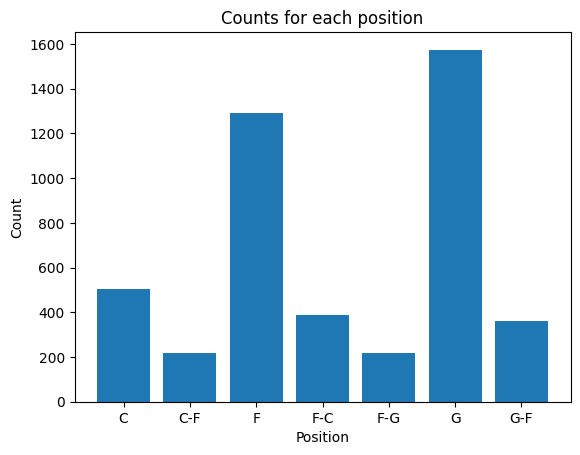

In [28]:
plt.bar(player_data.groupby('position').size().index, player_data.groupby('position').size().values)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Counts for each position')
plt.show()

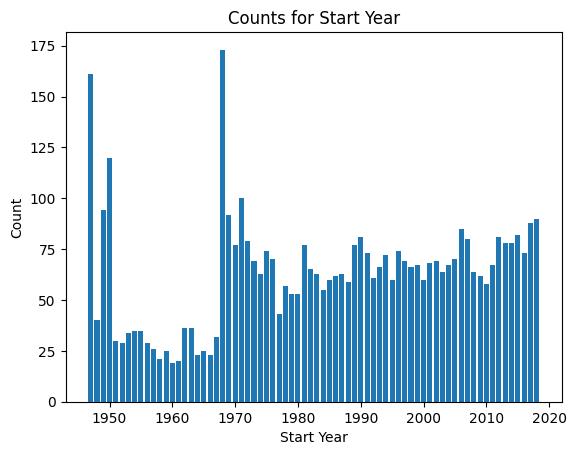

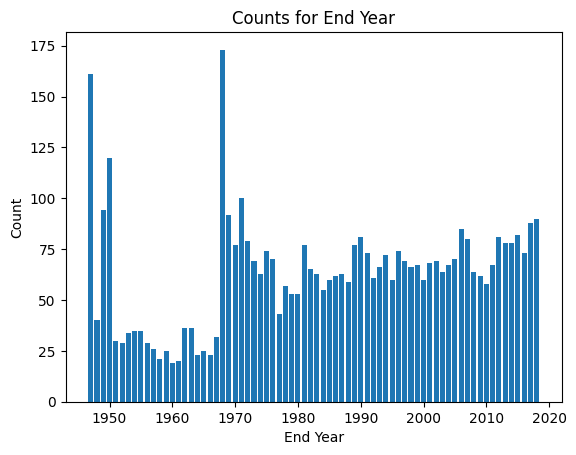

In [29]:
plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.title('Counts for Start Year')
plt.show()

plt.bar(player_data.groupby('year_start').size().index, player_data.groupby('year_start').size().values)
plt.xlabel('End Year')
plt.ylabel('Count')
plt.title('Counts for End Year')
plt.show()

In [30]:
stats = pd.read_csv("season_stats_preprocessed.csv")

# Unsupervised Naive K-Means Clustering (Points, Rebounds, Assists, Steals, Blocks)

As part of our exploratory data analysis, we did a round of naive k-means clustering, taking into account 5 stat columns which are subjectively "most relevant" to player performance and player type: points, rebounds, assists, steals and blocks. We used 5 clusters in the hopes of seeing each cluster group associated with a different position. The results yielded clusters which had datapoints evenly distributed between the 5 position classes. We hypothesized that a reason for this could be a lack of data preprocessing - some players had more stats than others, so they would be grouped in a similar class, regardless of which stats stood out. To that end, we decided to try multiple types of preprocessing on these columns - division by the number of minutes played, and normalization.

In [31]:
from sklearn.cluster import KMeans

unsupervised_kmeans_stats = stats[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]].dropna()

unsupervised_kmeans_stats_1 = unsupervised_kmeans_stats.copy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(unsupervised_kmeans_stats_1)

unsupervised_kmeans_stats_1["cluster"] = kmeans.labels_
unsupervised_kmeans_stats_1.insert(0, "Pos", stats["Pos"])
unsupervised_kmeans_stats_1.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
0,SF,914.0,106.0,224.0,156.0,120.0,36.0,2
1,SG,167.0,31.0,42.0,38.0,31.0,11.0,1
2,SG,816.0,77.0,104.0,215.0,111.0,27.0,2
3,PG,473.0,37.0,46.0,147.0,45.0,15.0,3
4,SF,351.0,32.0,34.0,47.0,29.0,5.0,3


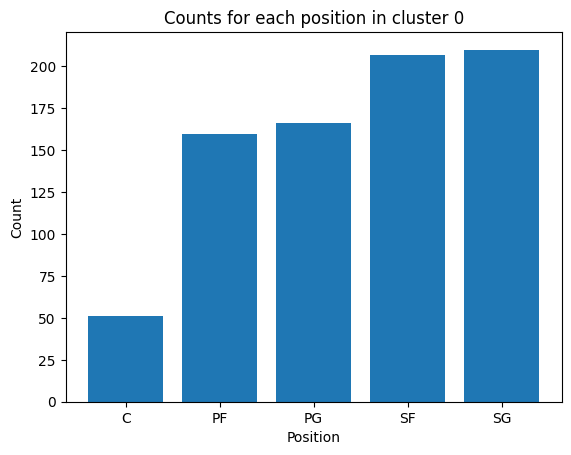

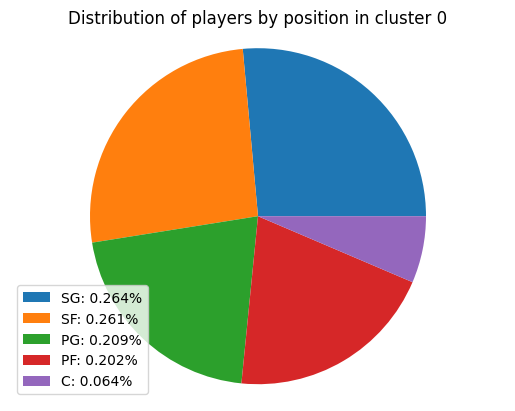

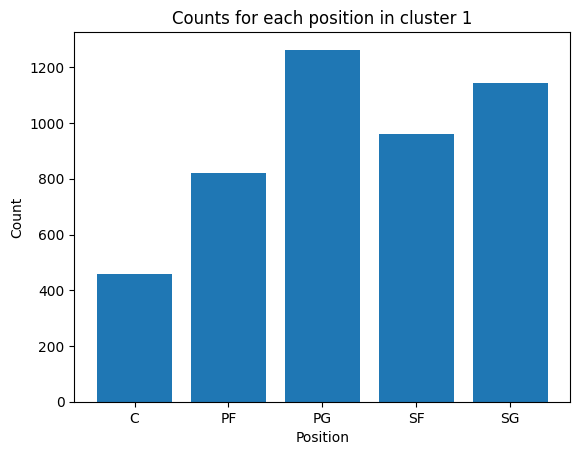

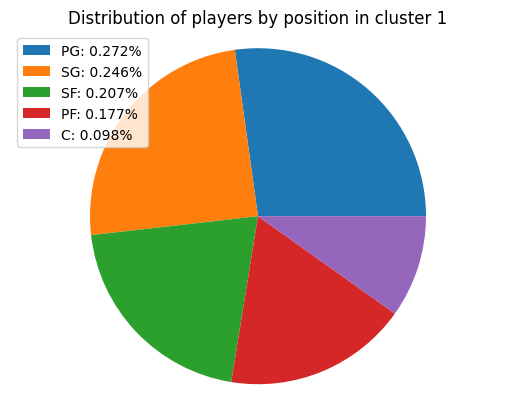

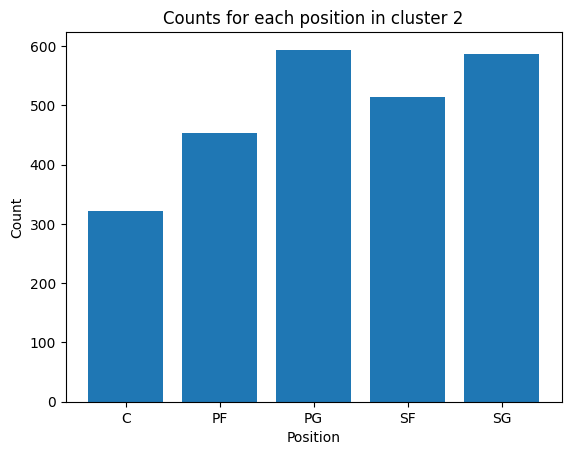

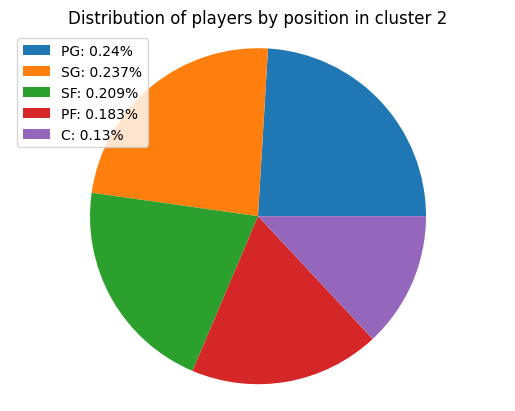

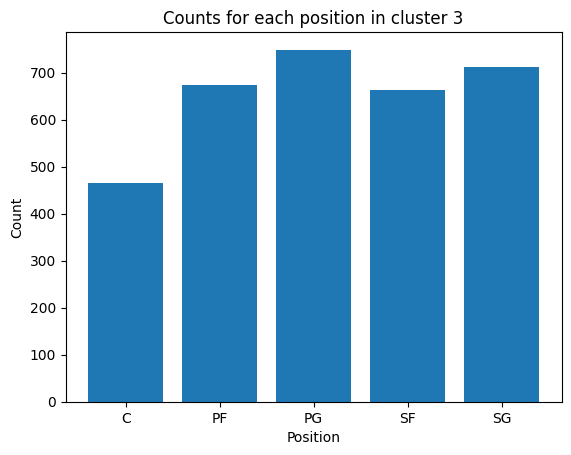

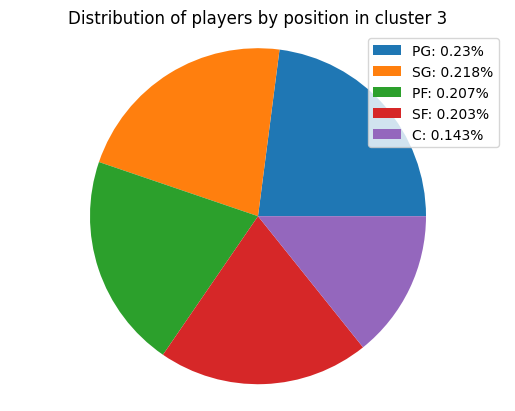

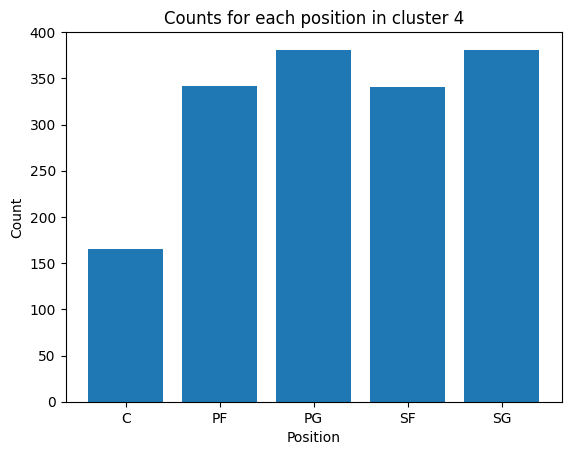

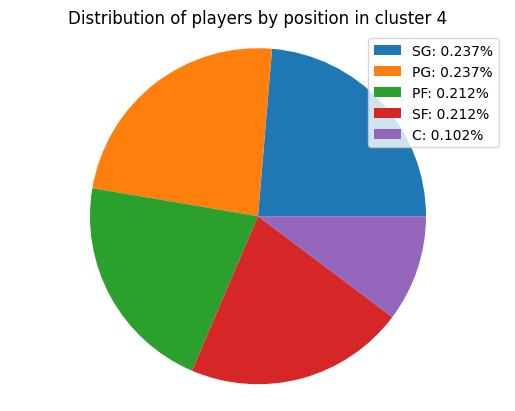

In [32]:
for cluster in range(5):
    cur_df = unsupervised_kmeans_stats_1.loc[unsupervised_kmeans_stats_1["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

    position_percentages = (cur_df['Pos'].value_counts() / len(cur_df)).sort_values(ascending=False)
    plt.pie(cur_df['Pos'].value_counts())
    plt.title(f"Distribution of players by position in cluster {cluster}")
    plt.axis("equal")
    legend_labels = [f"{position}: {round(percentage, 3)}%" for position, percentage in zip(position_percentages.index, position_percentages.values)]
    plt.legend(legend_labels, loc="best")
    plt.show()

### Normalization

In [33]:
# Normalization
unsupervised_kmeans_stats_2 = (unsupervised_kmeans_stats-unsupervised_kmeans_stats.mean())/unsupervised_kmeans_stats.std()

kmeans = KMeans(n_clusters=5)
kmeans.fit(unsupervised_kmeans_stats_2)

unsupervised_kmeans_stats_2["cluster"] = kmeans.labels_
unsupervised_kmeans_stats_2.insert(0, "Pos", stats["Pos"])
unsupervised_kmeans_stats_2.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
0,SF,0.876407,0.749067,0.587344,0.219063,2.092159,0.454613,3
1,SG,-0.794199,-0.464349,-0.802196,-0.636643,-0.335487,-0.355932,0
2,SG,0.657238,0.279880,-0.328836,0.646916,1.846667,0.162817,4
3,PG,-0.109854,-0.367276,-0.771657,0.153797,0.046390,-0.226245,4
4,SF,-0.382698,-0.448170,-0.863275,-0.571378,-0.390041,-0.550462,0


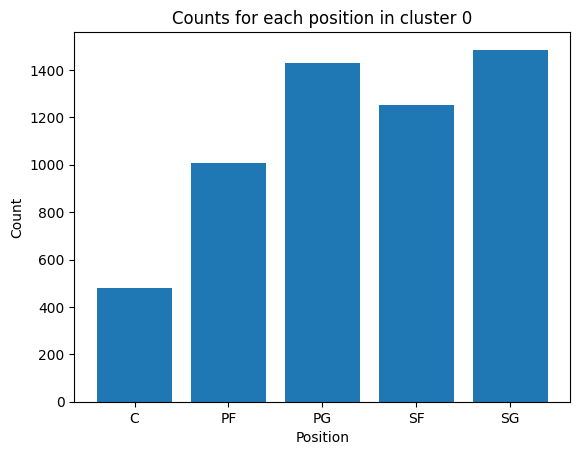

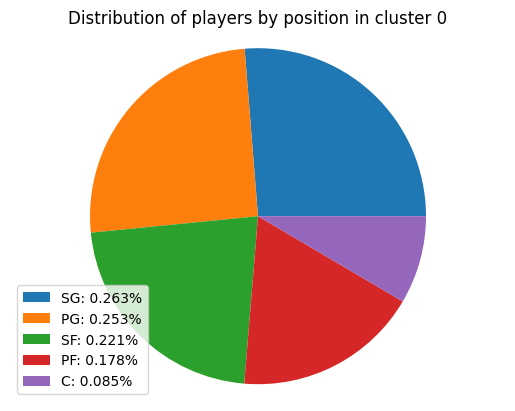

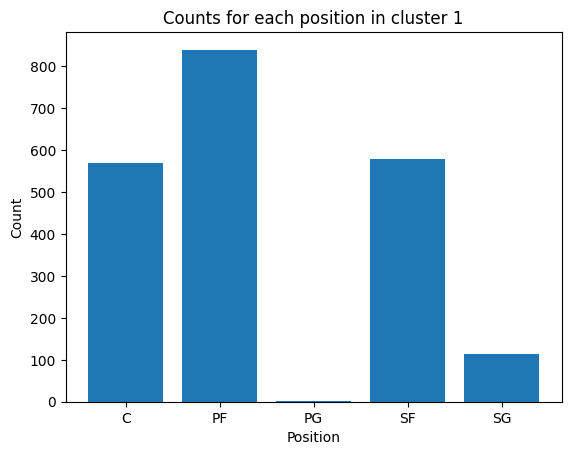

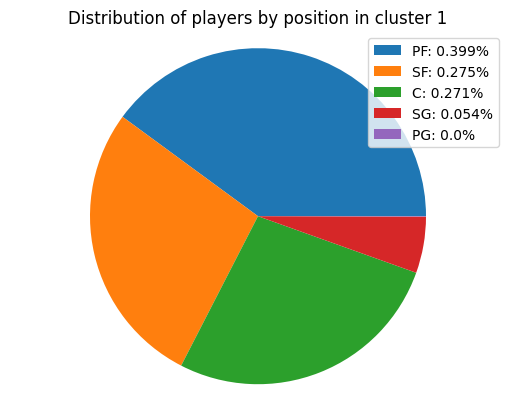

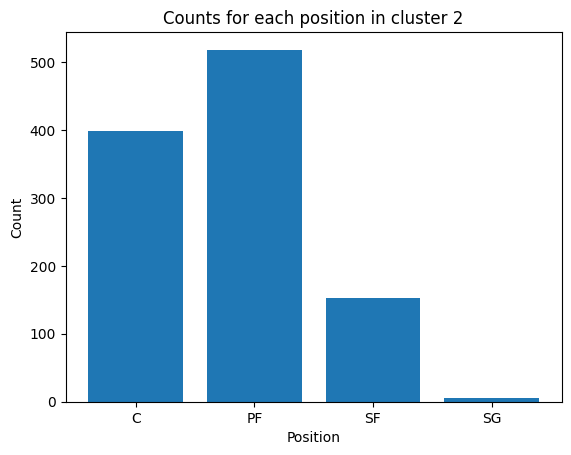

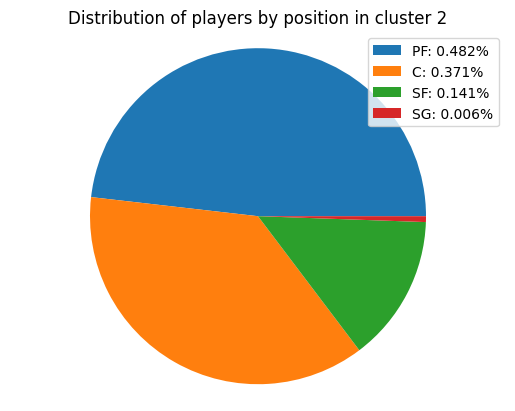

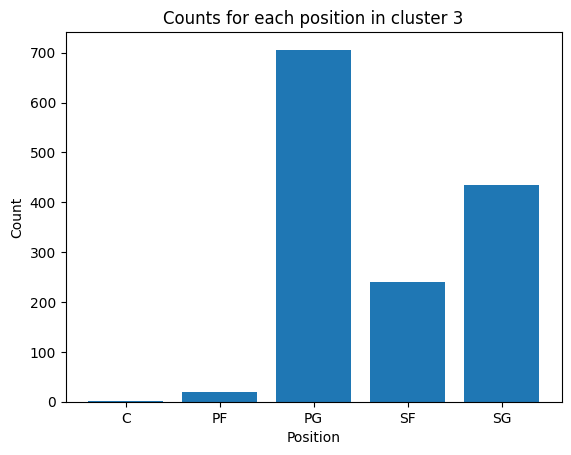

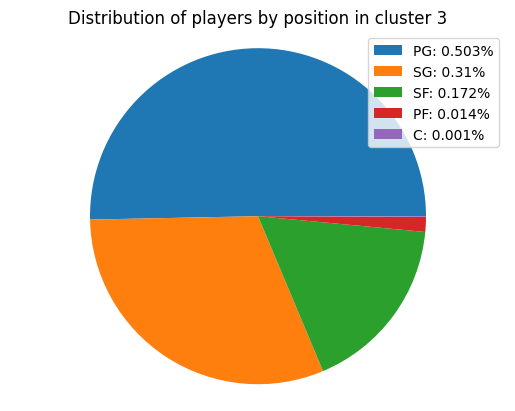

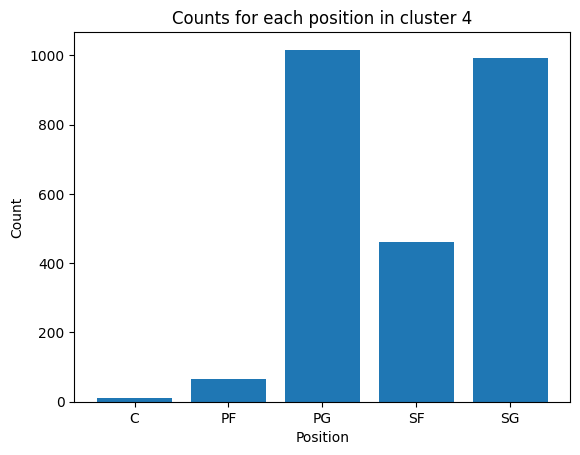

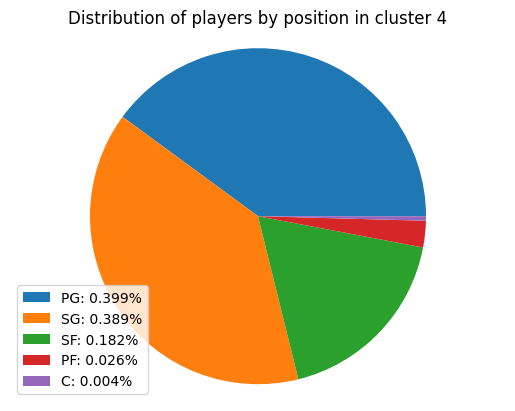

In [34]:
for cluster in range(5):
    cur_df = unsupervised_kmeans_stats_2.loc[unsupervised_kmeans_stats_2["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

    position_percentages = (cur_df['Pos'].value_counts() / len(cur_df)).sort_values(ascending=False)
    plt.pie(cur_df['Pos'].value_counts())
    plt.title(f"Distribution of players by position in cluster {cluster}")
    plt.axis("equal")
    legend_labels = [f"{position}: {round(percentage, 3)}%" for position, percentage in zip(position_percentages.index, position_percentages.values)]
    plt.legend(legend_labels, loc="best")
    plt.show()

### Division by Number of Minutes

In [35]:
# TODO: Division by number of minutes
unsupervised_kmeans_stats_3 = unsupervised_kmeans_stats.copy()
unsupervised_kmeans_stats_3.insert(0, "MIN", stats["MP"])
unsupervised_kmeans_stats_3[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]] = (
    unsupervised_kmeans_stats_3[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]].div(unsupervised_kmeans_stats_3["MIN"], axis=0)
)
unsupervised_kmeans_stats_3 = unsupervised_kmeans_stats_3.drop("MIN", axis=1).dropna()

kmeans = KMeans(n_clusters=5)
kmeans.fit(unsupervised_kmeans_stats_3)

unsupervised_kmeans_stats_3["cluster"] = kmeans.labels_
unsupervised_kmeans_stats_3.insert(0, "Pos", stats["Pos"])
unsupervised_kmeans_stats_3.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
0,SF,0.458375,0.053159,0.112337,0.078235,0.060181,0.018054,1
1,SG,0.319312,0.059273,0.080306,0.072658,0.059273,0.021033,3
2,SG,0.385816,0.036407,0.049173,0.101655,0.052482,0.012766,4
3,PG,0.445806,0.034873,0.043355,0.138549,0.042413,0.014138,4
4,SF,0.520772,0.047478,0.050445,0.069733,0.043027,0.007418,2


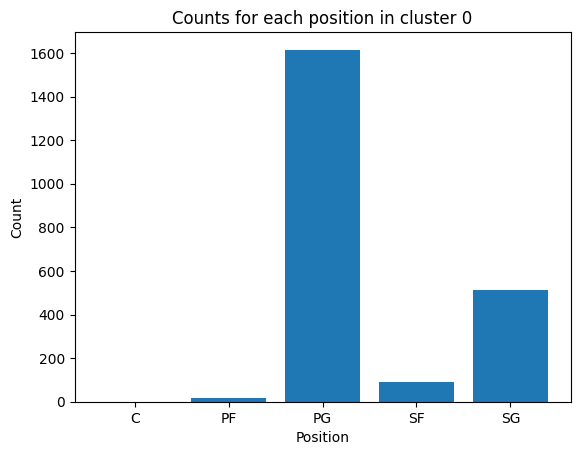

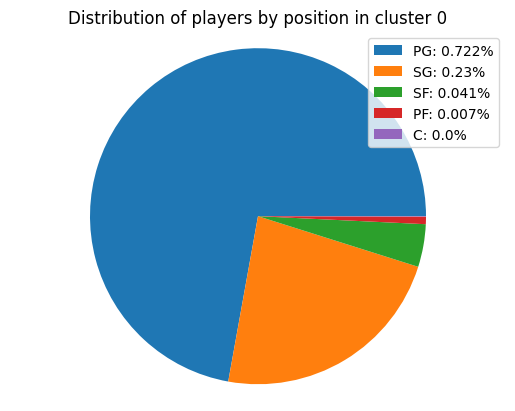

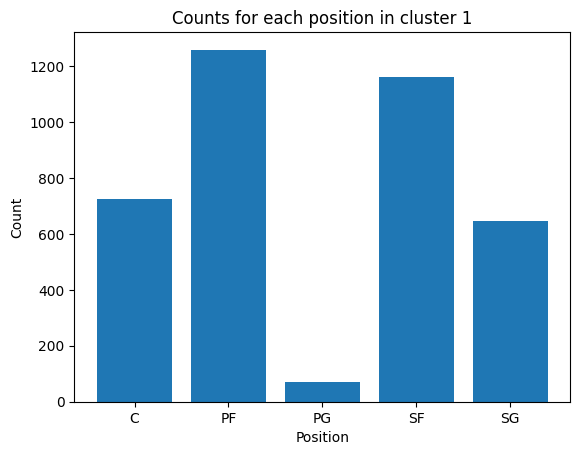

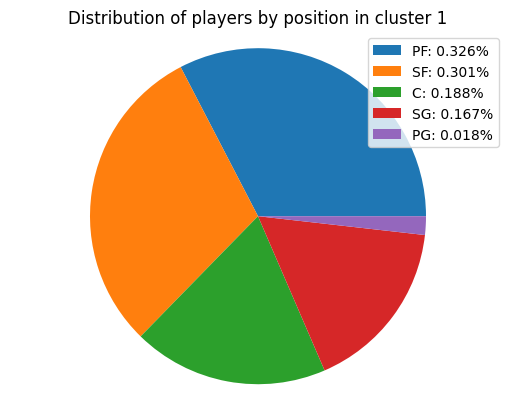

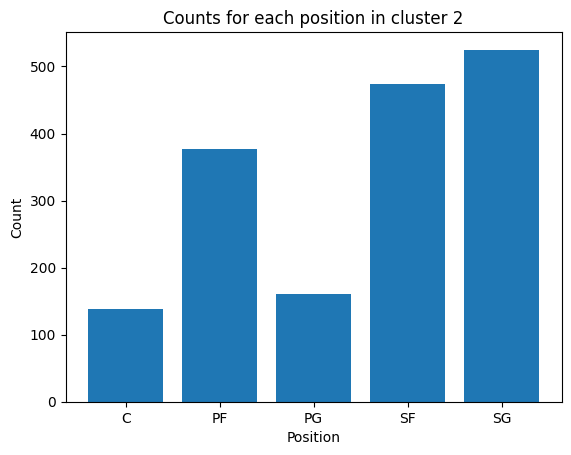

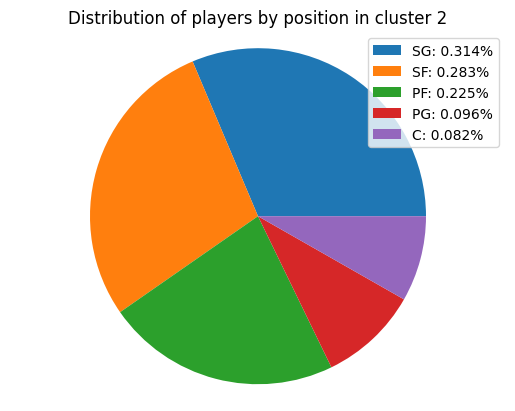

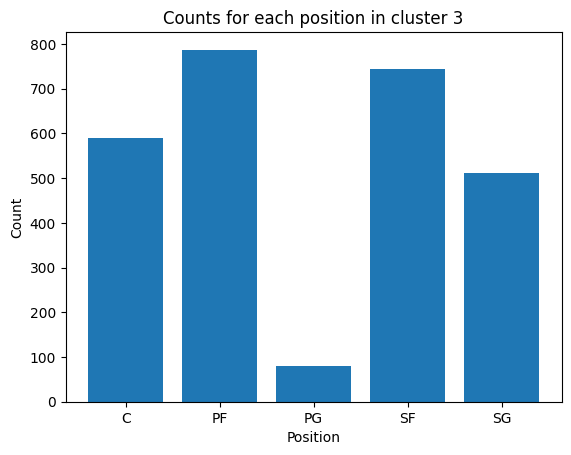

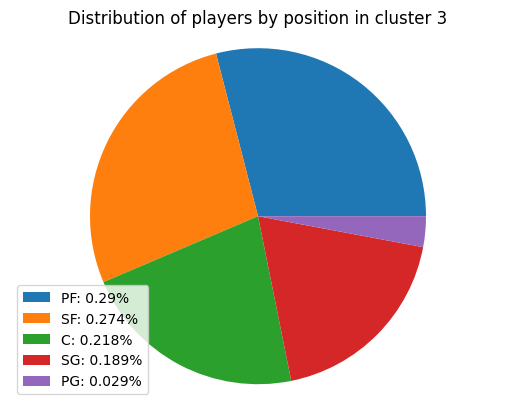

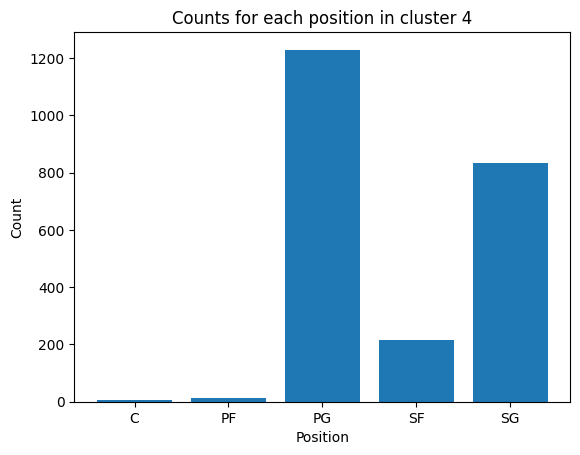

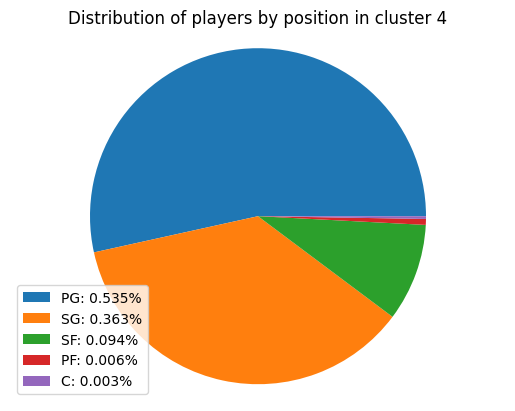

In [36]:
for cluster in range(5):
    cur_df = unsupervised_kmeans_stats_3.loc[unsupervised_kmeans_stats_3["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

    position_percentages = (cur_df['Pos'].value_counts() / len(cur_df)).sort_values(ascending=False)
    plt.pie(cur_df['Pos'].value_counts())
    plt.title(f"Distribution of players by position in cluster {cluster}")
    plt.axis("equal")
    legend_labels = [f"{position}: {round(percentage, 3)}%" for position, percentage in zip(position_percentages.index, position_percentages.values)]
    plt.legend(legend_labels, loc="best")
    plt.show()

In [37]:
for column in stats:
    print(column)

Unnamed: 0
Index
Year
Player
Pos
Age
Tm
G
GS
MP
PER
TS%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
USG%
OWS
DWS
WS
WS/48
OBPM
DBPM
BPM
VORP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
height_inches
weight


# Agglomerative Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_stats = stats[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]].dropna()

agglomerative_stats_1 = agglomerative_stats.copy()
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_clustering.fit(agglomerative_stats_1)

agglomerative_stats_1["cluster"] = agglomerative_clustering.labels_
agglomerative_stats_1.insert(0, "Pos", stats["Pos"])
agglomerative_stats_1.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
0,SF,914.0,106.0,224.0,156.0,120.0,36.0,0
1,SG,167.0,31.0,42.0,38.0,31.0,11.0,4
2,SG,816.0,77.0,104.0,215.0,111.0,27.0,2
3,PG,473.0,37.0,46.0,147.0,45.0,15.0,2
4,SF,351.0,32.0,34.0,47.0,29.0,5.0,1


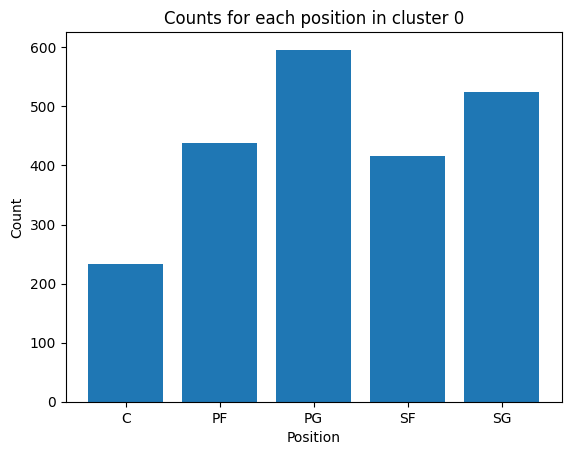

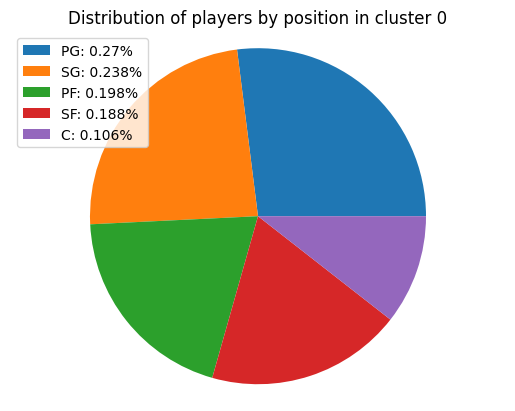

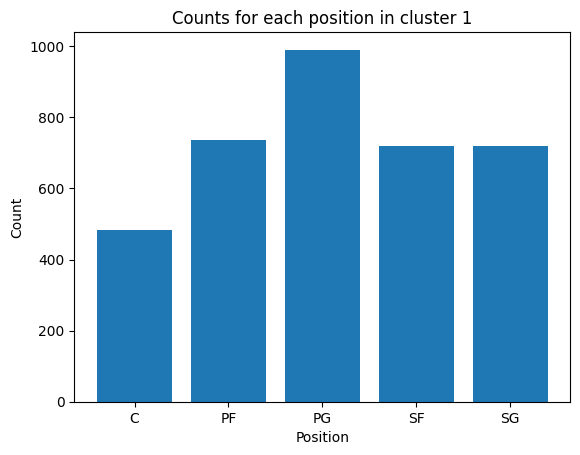

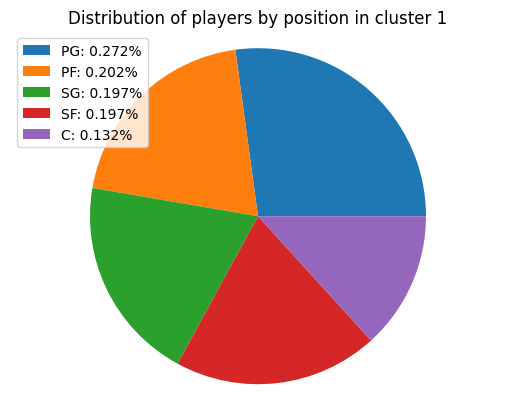

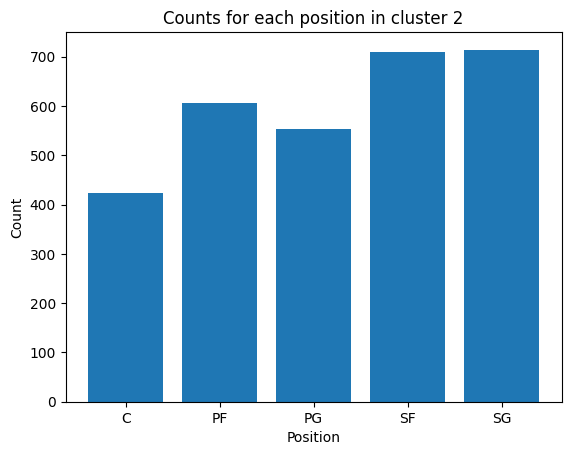

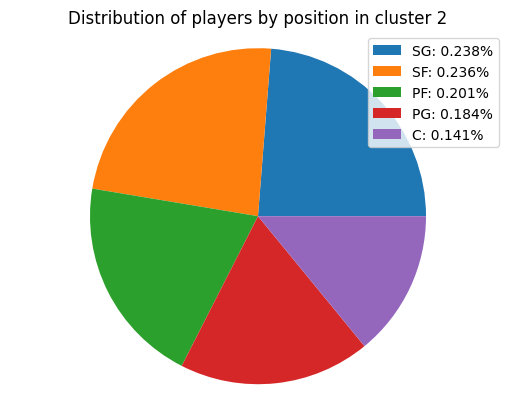

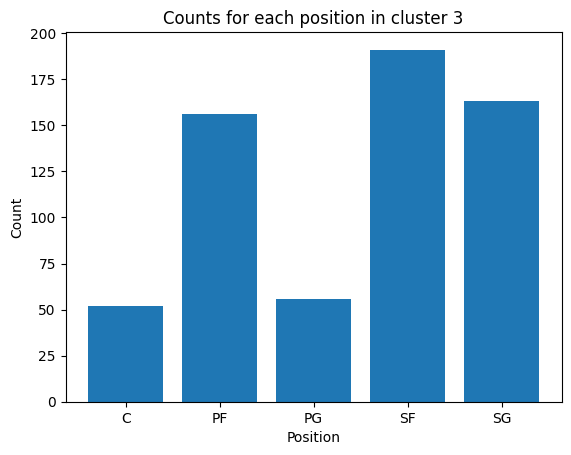

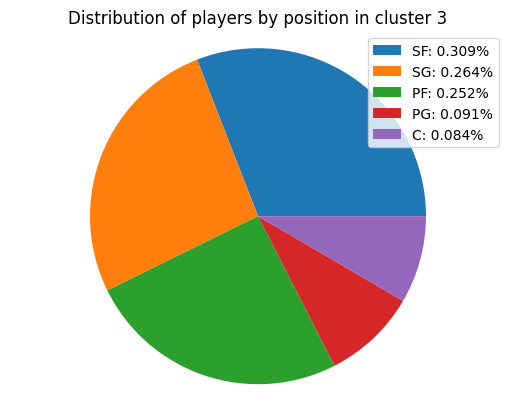

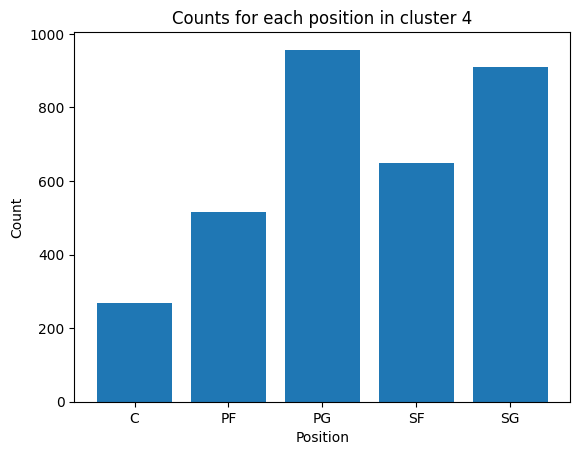

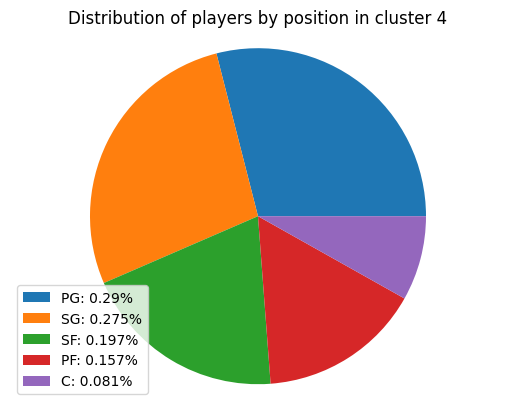

In [39]:
for cluster in range(5):
    cur_df = agglomerative_stats_1.loc[agglomerative_stats_1["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

    position_percentages = (cur_df['Pos'].value_counts() / len(cur_df)).sort_values(ascending=False)
    plt.pie(cur_df['Pos'].value_counts())
    plt.title(f"Distribution of players by position in cluster {cluster}")
    plt.axis("equal")
    legend_labels = [f"{position}: {round(percentage, 3)}%" for position, percentage in zip(position_percentages.index, position_percentages.values)]
    plt.legend(legend_labels, loc="best")
    plt.show()

### Normalization

In [40]:
# Normalization
agglomerative_stats_2 = (agglomerative_stats-agglomerative_stats.mean())/agglomerative_stats.std()

agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_clustering.fit(agglomerative_stats_2)

agglomerative_stats_2["cluster"] = agglomerative_clustering.labels_
agglomerative_stats_2.insert(0, "Pos", stats["Pos"])
agglomerative_stats_2.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
0,SF,0.876407,0.749067,0.587344,0.219063,2.092159,0.454613,0
1,SG,-0.794199,-0.464349,-0.802196,-0.636643,-0.335487,-0.355932,3
2,SG,0.657238,0.279880,-0.328836,0.646916,1.846667,0.162817,0
3,PG,-0.109854,-0.367276,-0.771657,0.153797,0.046390,-0.226245,0
4,SF,-0.382698,-0.448170,-0.863275,-0.571378,-0.390041,-0.550462,3


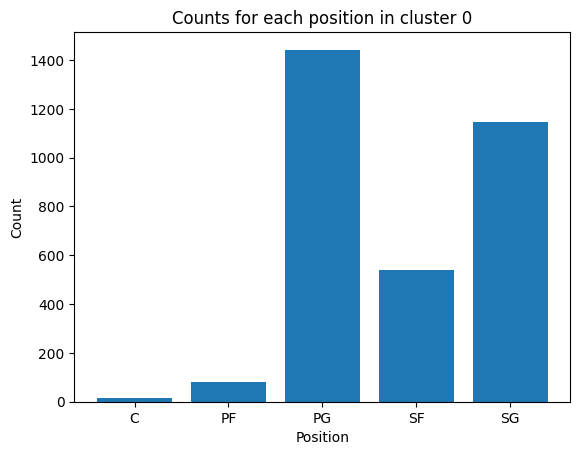

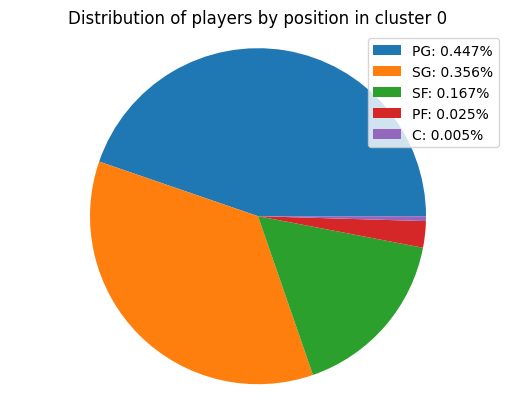

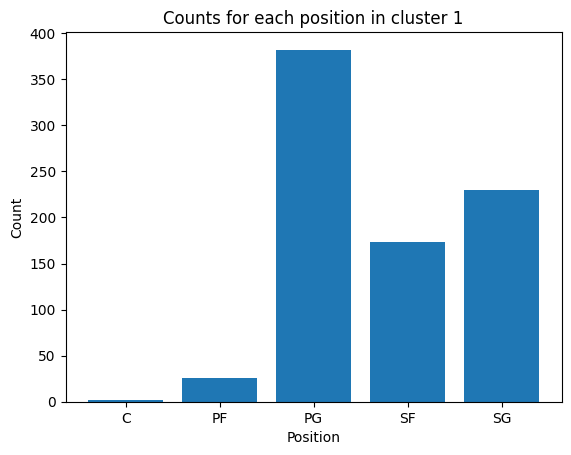

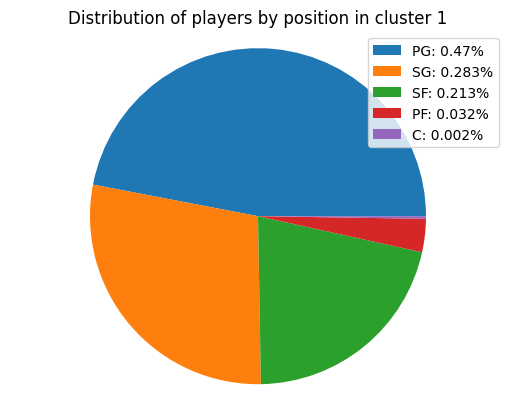

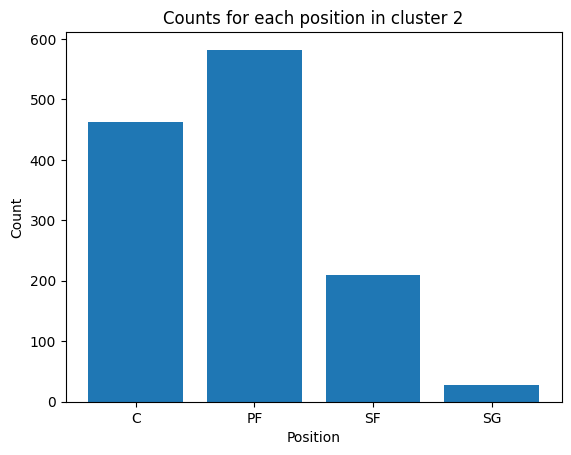

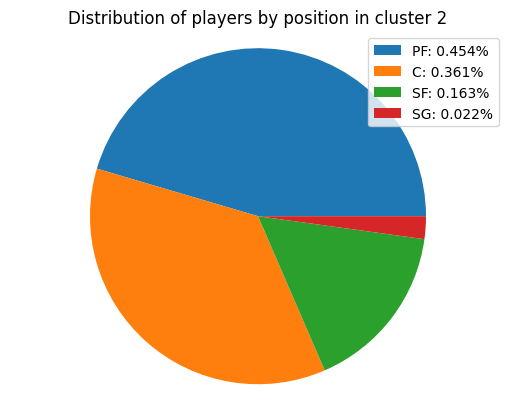

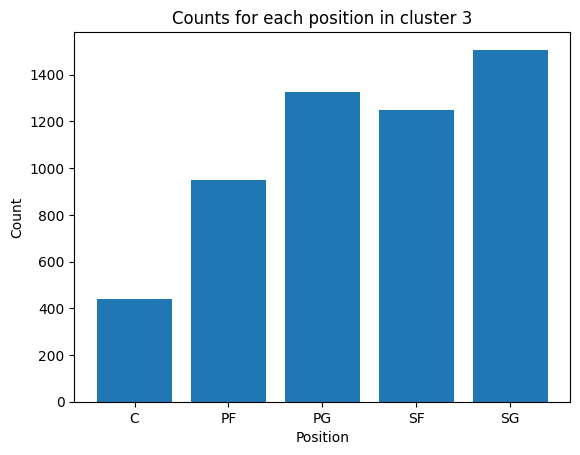

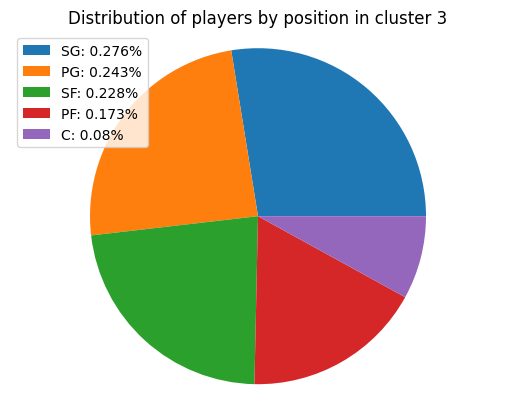

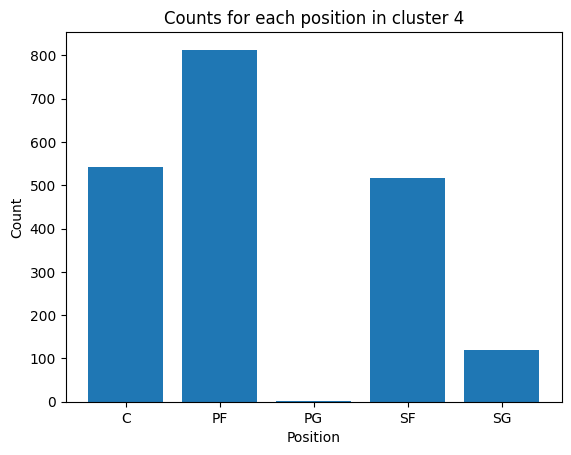

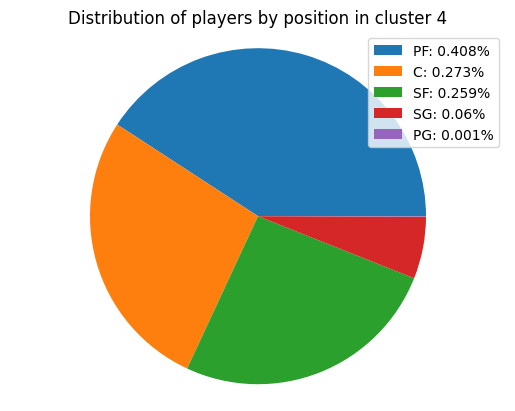

In [41]:
for cluster in range(5):
    cur_df = agglomerative_stats_2.loc[agglomerative_stats_2["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

    position_percentages = (cur_df['Pos'].value_counts() / len(cur_df)).sort_values(ascending=False)
    plt.pie(cur_df['Pos'].value_counts())
    plt.title(f"Distribution of players by position in cluster {cluster}")
    plt.axis("equal")
    legend_labels = [f"{position}: {round(percentage, 3)}%" for position, percentage in zip(position_percentages.index, position_percentages.values)]
    plt.legend(legend_labels, loc="best")
    plt.show()

### Normalization with 3 Clusters

In [42]:
# Normalization
agglomerative_stats_3 = (agglomerative_stats-agglomerative_stats.mean())/agglomerative_stats.std()

agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
agglomerative_clustering.fit(agglomerative_stats_3)

agglomerative_stats_3["cluster"] = agglomerative_clustering.labels_
agglomerative_stats_3.insert(0, "Pos", stats["Pos"])
agglomerative_stats_3.head()

,Pos,PTS,ORB,DRB,AST,STL,BLK,cluster
0,SF,0.876407,0.749067,0.587344,0.219063,2.092159,0.454613,0
1,SG,-0.794199,-0.464349,-0.802196,-0.636643,-0.335487,-0.355932,1
2,SG,0.657238,0.279880,-0.328836,0.646916,1.846667,0.162817,0
3,PG,-0.109854,-0.367276,-0.771657,0.153797,0.046390,-0.226245,0
4,SF,-0.382698,-0.448170,-0.863275,-0.571378,-0.390041,-0.550462,1


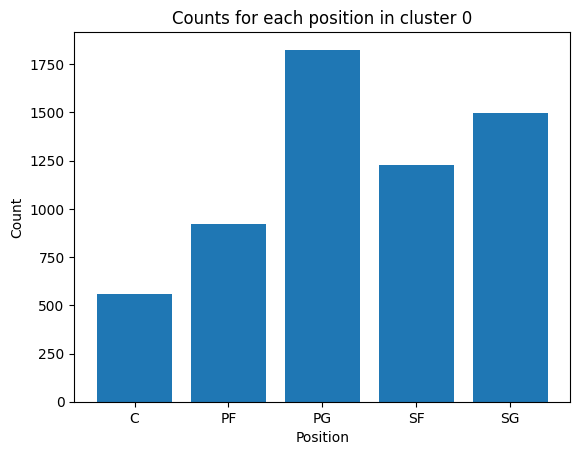

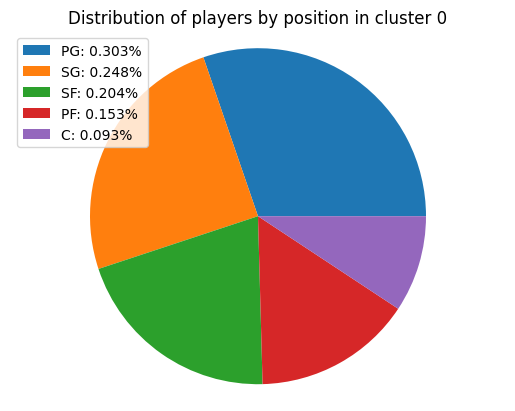

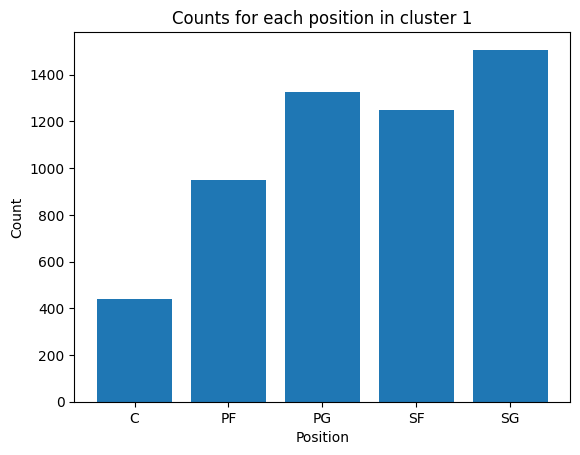

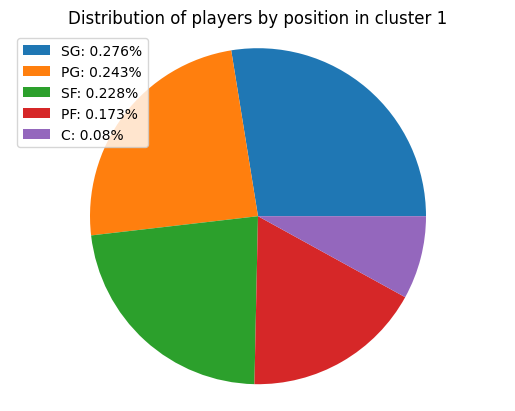

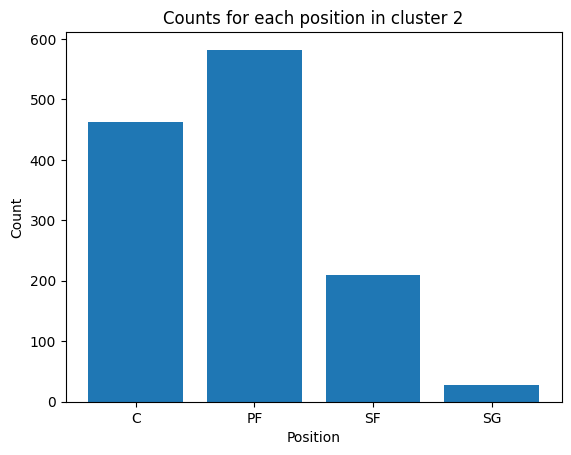

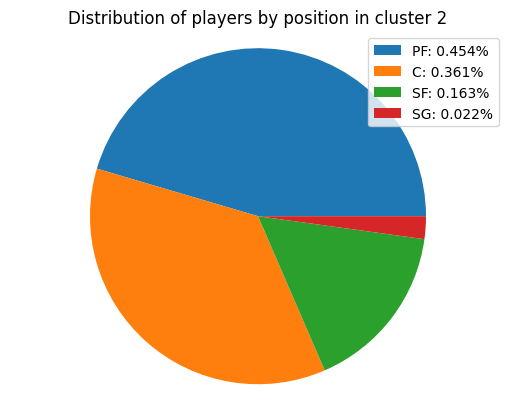

In [43]:
for cluster in range(3):
    cur_df = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == cluster]
    plt.bar(cur_df.groupby('Pos').size().index, cur_df.groupby('Pos').size().values)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.title(f'Counts for each position in cluster {cluster}')
    plt.show()

    position_percentages = (cur_df['Pos'].value_counts() / len(cur_df)).sort_values(ascending=False)
    plt.pie(cur_df['Pos'].value_counts())
    plt.title(f"Distribution of players by position in cluster {cluster}")
    plt.axis("equal")
    legend_labels = [f"{position}: {round(percentage, 3)}%" for position, percentage in zip(position_percentages.index, position_percentages.values)]
    plt.legend(legend_labels, loc="best")
    plt.show()

# Outlier Analysis - From Clustering

Visual observation of the counts from clusters 1 and 2 shows that cluster 1 contains mostly backcourt players - those playing center or power forward. Similarly, cluster 2 conatins mostly frontcourt players - those playing point guard and shooting guard. As a result, we'll inspect the player info of the rows in those clusters which do not fit within those groups and therefore can be classified as "outliers" in a sense.

In [44]:
cluster_1 = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == 1]
cluster_1.head()
cluster_1_pf_outliers = cluster_1.loc[cluster_1["Pos"] == "PF"]
cluster_1_c_outliers = cluster_1.loc[cluster_1["Pos"] == "C"]
cluster_1_outliers = pd.concat([cluster_1_pf_outliers, cluster_1_c_outliers], axis=0)
stats.loc[cluster_1_outliers.index.values]

,Unnamed: 0,Index,Year,Player,Pos,Age,Tm,G,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height_inches,weight
45,6495,6495,1982.0,Kenny Carr,PF,26.0,DET,28.0,6.0,444.0,...,84.0,137.0,23.0,6.0,6.0,40.0,69.0,207.0,79.0,220.0
48,6502,6502,1982.0,Bobby Cattage,PF,23.0,UTA,49.0,0.0,337.0,...,51.0,73.0,7.0,7.0,0.0,18.0,58.0,150.0,81.0,250.0
66,6528,6528,1982.0,Larry Demic,PF,24.0,NYK,48.0,0.0,356.0,...,50.0,79.0,14.0,4.0,6.0,26.0,65.0,92.0,81.0,225.0
146,6651,6651,1982.0,John Lambert,PF,29.0,TOT,63.0,7.0,764.0,...,123.0,178.0,37.0,18.0,16.0,48.0,123.0,207.0,82.0,225.0
147,6652,6652,1982.0,John Lambert,PF,29.0,KCK,42.0,1.0,493.0,...,91.0,127.0,24.0,12.0,10.0,38.0,80.0,142.0,82.0,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,25005,12996,1997.0,Jamie Feick,C,22.0,TOT,41.0,0.0,624.0,...,132.0,214.0,26.0,16.0,14.0,31.0,78.0,151.0,81.0,255.0
12662,25008,13385,1997.0,Aaron Williams,C,25.0,TOT,33.0,1.0,563.0,...,81.0,143.0,15.0,16.0,29.0,32.0,72.0,203.0,81.0,220.0
12688,25044,17107,2005.0,Vin Baker,C,33.0,TOT,27.0,0.0,204.0,...,22.0,39.0,10.0,2.0,4.0,17.0,38.0,35.0,83.0,232.0
12733,25109,19941,2010.0,Hilton Armstrong,C,25.0,TOT,33.0,0.0,335.0,...,54.0,81.0,21.0,15.0,12.0,22.0,59.0,71.0,83.0,235.0


In [45]:
cluster_2 = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == 2]
cluster_2.head()
cluster_2_pg_outliers = cluster_2.loc[cluster_2["Pos"] == "PG"]
cluster_2_sg_outliers = cluster_2.loc[cluster_2["Pos"] == "SG"]
cluster_2_outliers = pd.concat([cluster_2_pg_outliers, cluster_2_sg_outliers], axis=0)
stats.loc[cluster_2_outliers.index.values]

,Unnamed: 0,Index,Year,Player,Pos,Age,Tm,G,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height_inches,weight
74,6539,6539,1982.0,T.R. Dunn,SG,26.0,DEN,82.0,80.0,2519.0,...,348.0,559.0,188.0,135.0,36.0,123.0,210.0,669.0,76.0,192.0
92,6566,6566,1982.0,Darrell Griffith,SG,23.0,UTA,80.0,79.0,2597.0,...,177.0,305.0,187.0,95.0,34.0,193.0,213.0,1582.0,76.0,190.0
340,6911,6911,1983.0,T.R. Dunn,SG,27.0,DEN,82.0,80.0,2640.0,...,384.0,615.0,189.0,147.0,25.0,113.0,218.0,627.0,76.0,192.0
414,7021,7021,1983.0,Billy Knight,SG,30.0,IND,80.0,54.0,2262.0,...,172.0,324.0,192.0,66.0,8.0,193.0,143.0,1370.0,78.0,195.0
608,7287,7287,1984.0,T.R. Dunn,SG,28.0,DEN,80.0,74.0,2705.0,...,379.0,574.0,228.0,173.0,32.0,97.0,233.0,454.0,76.0,192.0
1030,7914,7914,1985.0,Al Wood,SG,26.0,SEA,80.0,79.0,2545.0,...,180.0,279.0,236.0,84.0,52.0,120.0,187.0,1203.0,78.0,193.0
2314,9719,9719,1990.0,Dennis Hopson,SG,24.0,NJN,79.0,64.0,2551.0,...,166.0,279.0,151.0,100.0,51.0,168.0,183.0,1251.0,77.0,200.0
2356,9779,9779,1990.0,Reggie Lewis,SG,24.0,BOS,79.0,54.0,2522.0,...,238.0,347.0,225.0,88.0,63.0,120.0,216.0,1340.0,79.0,195.0
2704,10240,10240,1991.0,Reggie Lewis,SG,25.0,BOS,79.0,79.0,2878.0,...,291.0,410.0,201.0,98.0,85.0,147.0,234.0,1478.0,79.0,195.0
2769,10328,10328,1991.0,Jerry Reynolds,SG,28.0,ORL,80.0,9.0,1843.0,...,211.0,299.0,203.0,95.0,56.0,172.0,123.0,1034.0,80.0,200.0


# Outlier Detection - iForest Approach

_add description of iForest approach for outlier detection here_

In [46]:
from sklearn.ensemble import IsolationForest

def iForest(data, n_estimators=100, outlier_fraction='auto'):
    isolation_forest = IsolationForest(n_estimators=n_estimators, contamination=outlier_fraction)
    # Fit the model to the data
    isolation_forest.fit(data)
    # Use the model to predict the outliers
    outliers = isolation_forest.predict(data) == -1
    # Extract the rows with outliers
    outliers_only = data[outliers]
    # Extract the rows without outliers
    no_outliers =data[~outliers]
    return outliers_only, no_outliers

for cluster in range(3):
    cur_df = agglomerative_stats_3.loc[agglomerative_stats_3["cluster"] == cluster]
    # print(cur_df[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]].head())
    outliers = iForest(cur_df[["PTS", "ORB", "DRB", "AST", "STL", "BLK"]])
    print(outliers)

(            PTS       ORB       DRB       AST       STL       BLK
17     2.155640  1.234434  2.671656  0.900727  2.555867  0.000708
40     0.858516  0.279880  0.197968  1.466364  3.565113 -0.615306
42     0.614746 -0.221666  0.228507  2.039252  3.292344  0.162817
50     0.802605 -0.140771  0.381204  3.924706  4.519805  0.357347
89     1.520497  0.409311  0.083445  3.656391  3.865159 -0.420775
...         ...       ...       ...       ...       ...       ...
12689  3.050209  0.749067  1.129418  1.459112  1.792113  0.843674
12736  0.538708  2.383134  1.434812 -0.571378 -0.062718  1.167892
12738  2.560432  0.296058  1.343194  1.263315  2.419482  0.681565
12743 -0.031580  0.344595  0.816390 -0.506112  0.537375  2.043280
12746  1.435513 -0.189308  0.564440  3.620133  2.228544 -0.355932

[866 rows x 6 columns],             PTS       ORB       DRB       AST       STL       BLK
0      0.876407  0.749067  0.587344  0.219063  2.092159  0.454613
2      0.657238  0.279880 -0.328836  0.646916  1.8